In [ ]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [1]:

import matplotlib.pyplot as plt

# 폰트 설정
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

def set_font(): 
    # 폰트 설정
    font_path='/System/Library/Fonts/AppleGothic.ttf'
    fontprop = fm.FontProperties(fname=font_path, size=10)
    plt.rcParams['font.family'] = 'AppleGothic'  # macOS
    plt.rcParams['axes.unicode_minus'] = False
    
set_font()

torch.Size([100, 1])
torch.Size([100, 1])


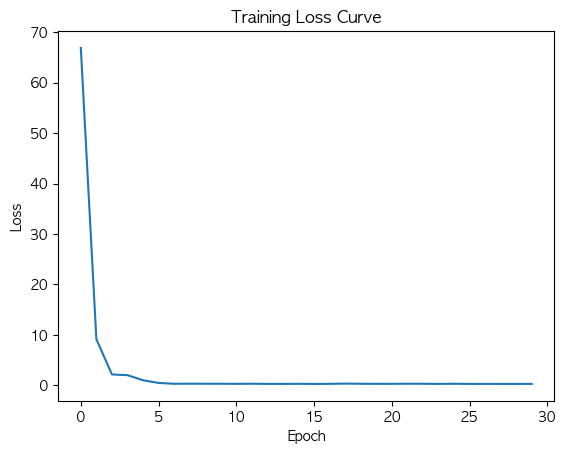

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader


# 더미 데이터 (y = 2x + 1)
x = torch.linspace(0, 10, 100).unsqueeze(1)#.unsqueeze(2)
y = 2 * x + 1 + torch.randn(100, 1) * 0.5
loader = DataLoader(TensorDataset(x, y), batch_size=10, shuffle=True)

print(x.shape)
print(y.shape)

# 단순 회귀 모델
model = nn.Sequential(
    nn.Linear(1, 8), nn.ReLU(), nn.Linear(8, 1)
)
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
criterion = nn.MSELoss()

losses = []
for epoch in range(30):
    epoch_loss = 0
    for xb, yb in loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    losses.append(epoch_loss / len(loader))

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


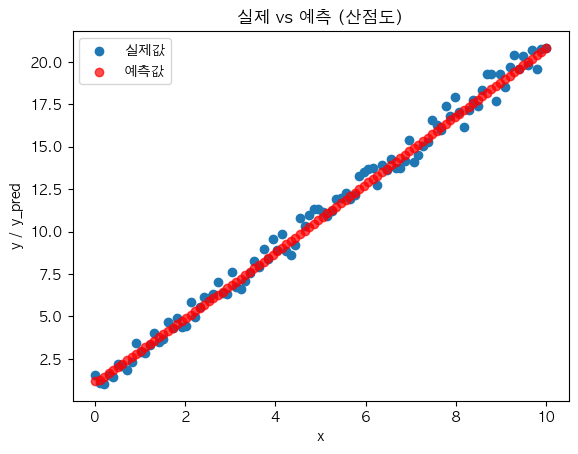

In [8]:
model.eval()
with torch.no_grad():
    y_pred = model(x).numpy().flatten()
plt.scatter(x.numpy(), y.numpy(), label="실제값")
plt.scatter(x.numpy(), y_pred, color='r', label="예측값", alpha=0.7)
plt.legend()
plt.xlabel("x")
plt.ylabel("y / y_pred")
plt.title("실제 vs 예측 (산점도)")
plt.show()


torch.Size([128, 1, 28, 28])
torch.Size([128])
tensor(4)
4


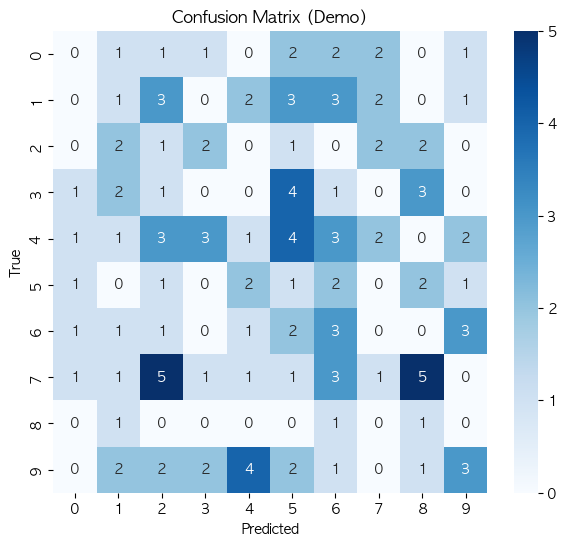

In [14]:
import torchvision
from torch.utils.data import DataLoader
import seaborn as sns
from sklearn.metrics import confusion_matrix

# MNIST 데이터 (10개만 빠르게)
transform = torchvision.transforms.ToTensor()
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
loader = DataLoader(testset, batch_size=128, shuffle=False)
images, labels = next(iter(loader))

print(images.shape)
print(labels.shape)
# Dummy CNN
class DummyCNN(nn.Module):
    def __init__(self): super().__init__()
    def forward(self, x): return torch.randint(0, 10, (x.size(0),))
model = DummyCNN()

# 예측값 (실전에서는 model(images)에서 argmax 사용)
y_pred_torch = model(images)
y_pred = y_pred_torch.numpy()
print(y_pred_torch[0])
print(y_pred[0])
cm = confusion_matrix(labels.numpy(), y_pred, labels=list(range(10)))

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Demo)")
plt.show()


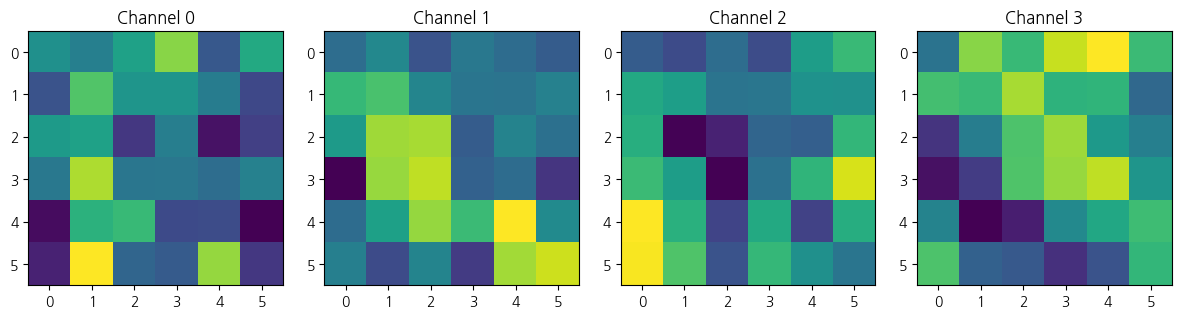

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 4, 3)
    def forward(self, x):
        return self.conv(x)

model = SimpleCNN()
img = torch.randn(1,1,8,8)
feature_maps = model(img)

# 4채널 feature map을 시각화
fig, axes = plt.subplots(1, 4, figsize=(12,3))
for i in range(4):
    axes[i].imshow(feature_maps[0,i].detach().numpy(), cmap='viridis')
    axes[i].set_title(f'Channel {i}')
plt.tight_layout()
plt.show()


In [ ]:
# 새로운 코드 셀
print("새로운 셀이 추가되었습니다!")